# causal impact analysis

to do:

+ causal impact

In [5]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact

from analysis.functions.datamanip import *

raw = pd.read_csv('found_seeds.tweets.csv')

# changing date to more readable format
raw['created_at'] = pd.to_datetime(raw['created_at'])

# getting seperated date and time columns
raw['date'] = raw['created_at'].dt.date
raw['time'] = raw['created_at'].dt.time
raw['hour'] = raw['created_at'].dt.hour

# changing na to None
raw = raw.fillna('None')

# only 4 samples that have no sentiment
raw = raw[raw['sentiment'] != 'None']

raw['ogtext'] = raw['cleantext']

ntweetdf, propdf = ntweet_prop_dfs(raw, 'date', 'sentiment')

ntweetdf.index = ntweetdf['date']

raw.head()


,created_at,sentiment,statefips,countyfips,cleantext,social distancing,social distance,socially distance,physical distance,physical distancing,...,virtual,online,screen,disposable,barriers,exposure,date,time,hour,ogtext
0,2020-02-10 07:03:44+00:00,POSITIVE,32.0,3.0,have mocha avoid coronavirus airport,0,0,0,0,0,...,0,0,0,0,0,0,2020-02-10,07:03:44,7,have mocha avoid coronavirus airport
1,2020-02-10 07:04:49+00:00,POSITIVE,36.0,81.0,heart beat china,0,0,0,0,0,...,0,0,0,0,0,0,2020-02-10,07:04:49,7,heart beat china
2,2020-02-10 07:05:30+00:00,POSITIVE,4.0,13.0,people stop sister street fun wearing mask s a...,0,0,0,0,0,...,0,0,0,0,0,0,2020-02-10,07:05:30,7,people stop sister street fun wearing mask s a...
3,2020-02-10 07:10:48+00:00,NEGATIVE,5.0,119.0,coronavirus death toll surpass number fatal...,0,0,0,0,0,...,0,0,0,0,0,0,2020-02-10,07:10:48,7,coronavirus death toll surpass number fatal...
4,2020-02-10 07:11:11+00:00,NEGATIVE,5.0,119.0,coronavirus case aboard japanese cruise shi...,0,0,0,0,0,...,0,0,0,0,0,0,2020-02-10,07:11:11,7,coronavirus case aboard japanese cruise shi...


# first and last date in data

In [3]:
print(raw.date.min(), raw.date.max())

2020-01-22 2020-06-12


# the number of tweets by date data

In [7]:
dated_data = ntweetdf[ntweetdf['sentiment'] == 'POSITIVE']['num_of_tweets'] + ntweetdf[ntweetdf['sentiment'] == 'NEGATIVE']['num_of_tweets']


# 2020-02-23 is missing from dataset
dates = pd.date_range(start='20200122', end='20200222').append(pd.date_range(start='20200224', end='20200612'))

dated_data.index = dates

dated_data = pd.DataFrame(dated_data)
dated_data.head()

,num_of_tweets
2020-01-22,84
2020-01-23,312
2020-01-24,1139
2020-01-25,1296
2020-01-26,1589


# testing causal impact

C:\Users\Alex\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn(&#39;A date index has been provided, but it has no&#39;
C:\Users\Alex\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn(&#39;No supported index is available.&#39;


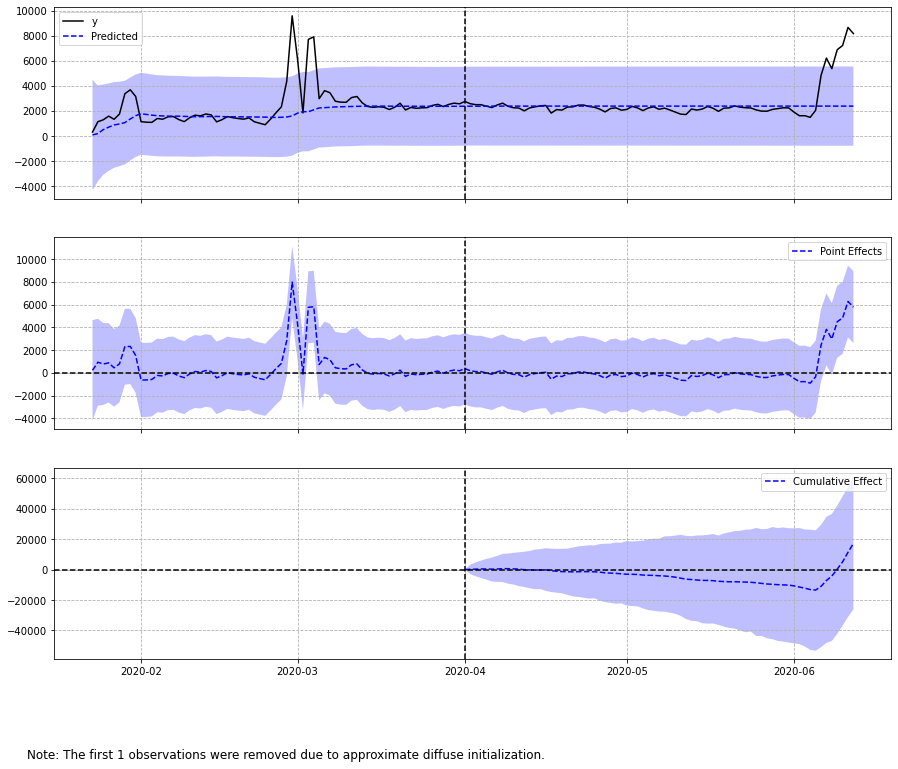

In [78]:
pre_period = ['20200122', '20200401']
post_period = ['20200402', '20200612']

ci = CausalImpact(dated_data, pre_period, post_period)
# print(ci.summary())
# print(ci.summary(output='report'))
ci.plot()

# what causal impact returns for data

In [5]:
ci.inferences

,post_cum_y,preds,post_preds,post_preds_lower,post_preds_upper,preds_lower,preds_upper,post_cum_pred,post_cum_pred_lower,post_cum_pred_upper,point_effects,point_effects_lower,point_effects_upper,post_cum_effects,post_cum_effects_lower,post_cum_effects_upper
2020-01-22,NaN,760.507042,NaN,NaN,NaN,-1.026128e+06,1.027649e+06,NaN,NaN,NaN,-703.507042,-1.027592e+06,1.026185e+06,NaN,NaN,NaN
2020-01-23,NaN,57.000713,NaN,NaN,NaN,-1.405288e+03,1.519289e+03,NaN,NaN,NaN,-30.000713,-1.492289e+03,1.432288e+03,NaN,NaN,NaN
2020-01-24,NaN,41.999851,NaN,NaN,NaN,-1.224394e+03,1.308393e+03,NaN,NaN,NaN,176.000149,-1.090393e+03,1.442394e+03,NaN,NaN,NaN
2020-01-25,NaN,100.673244,NaN,NaN,NaN,-1.093308e+03,1.294654e+03,NaN,NaN,NaN,-6.673244,-1.200654e+03,1.187308e+03,NaN,NaN,NaN
2020-01-26,NaN,99.004534,NaN,NaN,NaN,-1.057076e+03,1.255085e+03,NaN,NaN,NaN,786.995466,-3.690848e+02,1.943076e+03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-08,109426.0,759.747385,759.747385,-284.667741,1804.162510,-2.846677e+02,1.804163e+03,51662.822155,39952.288593,64301.752553,902.252615,-1.421625e+02,1.946668e+03,57763.177845,45124.247447,69473.711407
2020-06-09,110519.0,759.747385,759.747385,-284.702798,1804.197567,-2.847028e+02,1.804198e+03,52422.569540,40491.707822,65054.529856,333.252615,-7.111976e+02,1.377703e+03,58096.430460,45464.470144,70027.292178
2020-06-10,112018.0,759.747385,759.747385,-284.737854,1804.232623,-2.847379e+02,1.804233e+03,53182.316924,40854.843731,65609.311720,739.252615,-3.052326e+02,1.783738e+03,58835.683076,46408.688280,71163.156269
2020-06-11,113098.0,759.747385,759.747385,-284.772908,1804.267678,-2.847729e+02,1.804268e+03,53942.064309,41272.445174,66774.261764,320.252615,-7.242677e+02,1.364773e+03,59155.935691,46323.738236,71825.554826


# impacts for beginning -> split -> end

output is useless

In [79]:
# dates = pd.date_range(start='20200122', end='20200612')

impacts = []

for i in range(len(dates)-4):
    pre = [str(dates[0]).split(' ')[0], str(dates[i+3]).split(' ')[0]]
    post = [str(dates[i+4]).split(' ')[0], str(dates[-1]).split(' ')[0]]
    ci = CausalImpact(dated_data, pre, post)
    impacts.append(ci.inferences['post_cum_effects'].max())

print(impacts)

 an integer index beginning at `start`.
  warnings.warn(&#39;No supported index is available.&#39;
C:\Users\Alex\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn(&#39;A date index has been provided, but it has no&#39;
C:\Users\Alex\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn(&#39;No supported index is available.&#39;
C:\Users\Alex\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn(&#39;A date index has 

# each day represents the total impact from that day to the end

[&lt;matplotlib.lines.Line2D at 0x23b39d69ee0&gt;]

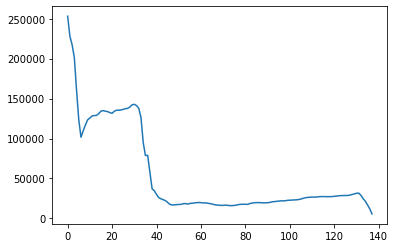

In [80]:
from matplotlib import pyplot as plt

plt.plot(impacts)

the causal impact trends downwards for each consecutive day, except for feb 3 where it spikes back up, and agaon after the drop where we see a steady increase after ~ day 100.

In [37]:
for i, impact in enumerate(impacts):
    if 99000 < impact < 100000:
        print(i, impact)

15 99026.04286377788


# the small dip and increase in on feb 3rd

In [38]:
dates[15-3]

Timestamp('2020-02-03 00:00:00', freq='D')

On February 3, 49 members of Congress signed a letter to CDC Director Redfield highlighting the urgency of distributing a rapid diagnostic kit that could be processed locally, rather than centrally at the CDC in Atlanta, which they referred to as an "unsustainable bottleneck" as the number of suspected cases rise.[18][45]

On February 3, Reuters reported that WHO chief Tedros Adhanom Ghebreyesus said there was no need for measures that "unnecessarily interfere with international travel and trade" to halt the coronavirus. He praised the Chinese response, and referred to the virus's spread as "minimal and slow".[46]

# impacts for beginning -> split -> 1 week after
output is useless

In [85]:
impacts = []

for i in range(len(dates)-4-7):
    pre = [str(dates[0]).split(' ')[0], str(dates[i+3]).split(' ')[0]]
    post = [str(dates[i+4]).split(' ')[0], str(dates[i+4+7]).split(' ')[0]]
    ci = CausalImpact(dated_data, pre, post)
    impacts.append(ci.inferences['post_cum_effects'].max())

print(impacts)

el.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn(&#39;A date index has been provided, but it has no&#39;
C:\Users\Alex\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn(&#39;No supported index is available.&#39;
C:\Users\Alex\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn(&#39;A date index has been provided, but it has no&#39;
C:\Users\Alex\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Predict

# each day represents the cumulative impact for the following 7 days

[&lt;matplotlib.lines.Line2D at 0x23b39b6f5e0&gt;]

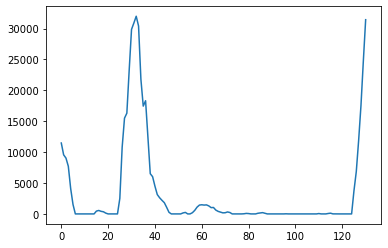

In [86]:
from matplotlib import pyplot as plt

plt.plot(impacts)

In [87]:
for i, impact in enumerate(impacts):
    if 2500 < impact:
        print(i, dates[i-3], impact)

0 2020-06-10 00:00:00 11475.043575279182
1 2020-06-11 00:00:00 9565.209022003228
2 2020-06-12 00:00:00 9033.454857733483
3 2020-01-22 00:00:00 7712.449931098257
4 2020-01-23 00:00:00 4122.969209956981
25 2020-02-13 00:00:00 2508.2631865384956
26 2020-02-14 00:00:00 10801.947501291463
27 2020-02-15 00:00:00 15500.068685168684
28 2020-02-16 00:00:00 16307.623403154466
29 2020-02-17 00:00:00 23273.174642184604
30 2020-02-18 00:00:00 29869.31291575416
31 2020-02-19 00:00:00 30903.867268398986
32 2020-02-20 00:00:00 31995.850725389086
33 2020-02-21 00:00:00 30415.662965999185
34 2020-02-22 00:00:00 21812.027354726517
35 2020-02-24 00:00:00 17450.582648568543
36 2020-02-25 00:00:00 18320.07911204518
37 2020-02-26 00:00:00 12466.748246634237
38 2020-02-27 00:00:00 6512.082881156239
39 2020-02-28 00:00:00 6025.957259159259
40 2020-02-29 00:00:00 4489.435600171979
41 2020-03-01 00:00:00 3131.459575785147
42 2020-03-02 00:00:00 2613.211152833541
125 2020-05-24 00:00:00 3728.885544292036
126 2020

# the line for number of tweets by day

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1ee8f107880&gt;

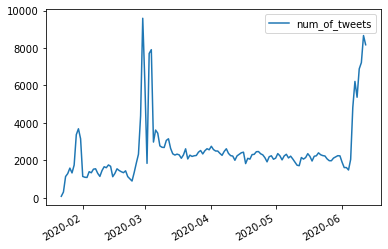

In [8]:
dated_data.plot.line()